<a href="https://colab.research.google.com/github/MaggieHDez/MathStatsAI/blob/main/polinomioTaylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    salario en miles  Probabilidad  Evaluacion_Taylor     Logistica      Error
0                  6        0.0600          98.604167  4.139938e-08  98.604167
1                  7        0.0000          81.833333  1.125352e-07  81.833333
2                  8        0.0400          67.062500  3.059022e-07  67.062500
3                  9        0.0200          54.166667  8.315280e-07  54.166666
4                 10        0.0600          43.020833  2.260324e-06  43.020831
5                 11        0.0400          33.500000  6.144175e-06  33.499994
6                 12        0.0200          25.479167  1.670142e-05  25.479150
7                 13        0.0600          18.833333  4.539787e-05  18.833288
8                 14        0.0399          13.437500  1.233946e-04  13.437377
9                 15        0.0397           9.166667  3.353501e-04   9.166331
10                16        0.0191           5.895833  9.110512e-04   5.894922
11                17        0.0175           3.50000

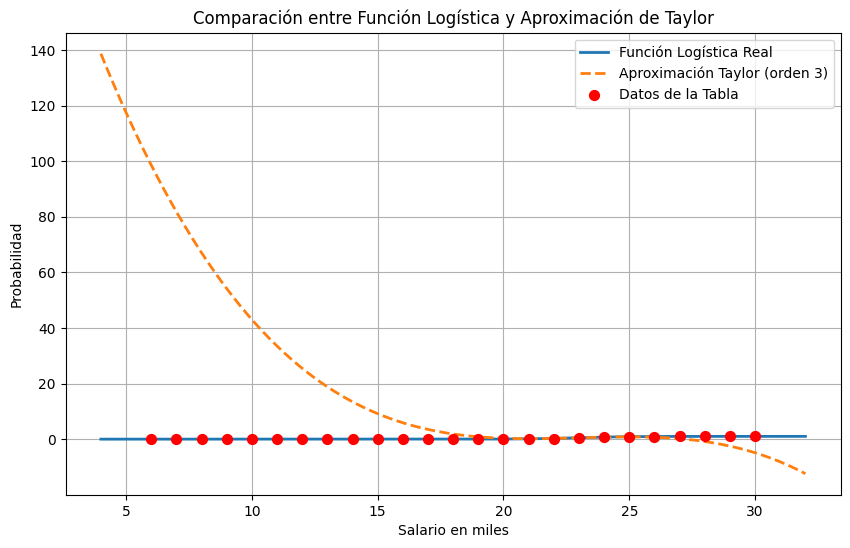

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
df = pd.read_csv('/content/drive/MyDrive/MathHW/compra_producto.csv')

# Asumimos que el archivo tiene columnas: "salario en miles" y "Probabilidad"
# Se sabe que para x = 23 la probabilidad es 0.5, por lo tanto x0 = 23.
x0 = 23

# Definir el polinomio de Taylor de orden 3 centrado en x0 = 23:
# P3(x) = 0.5 + 0.25*(x - 23) - (1/48)*(x - 23)**3
def taylor_polynomial(x):
    return 0.5 + 0.25 * (x - x0) - (1/48) * (x - x0)**3

# Definir también la función logística real para comparación:
def logistic(x):
    return 1 / (1 + np.exp(-(x - x0)))

# Evaluar el polinomio de Taylor para cada valor de "salario en miles"
df['Evaluacion_Taylor'] = df['salario en miles'].apply(taylor_polynomial)

# Evaluar la función logística real para cada valor
df['Logistica'] = df['salario en miles'].apply(logistic)

# Calcular el error absoluto entre la función real y la aproximación de Taylor
df['Error'] = abs(df['Logistica'] - df['Evaluacion_Taylor'])

# Mostrar la tabla con los resultados
print(df)

# ------------------
# Parte de Graficación
# ------------------

# Definir un rango de valores para x que cubra los salarios, con algo de margen.
x_values = np.linspace(df['salario en miles'].min() - 2, df['salario en miles'].max() + 2, 400)

# Calcular la función logística y el polinomio de Taylor para ese rango
y_logistic = logistic(x_values)
y_taylor = taylor_polynomial(x_values)

# Crear la figura
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_logistic, label='Función Logística Real', linewidth=2)
plt.plot(x_values, y_taylor, '--', label='Aproximación Taylor (orden 3)', linewidth=2)
plt.scatter(df['salario en miles'], df['Probabilidad'], color='red', label='Datos de la Tabla', zorder=5, s=50)
plt.xlabel('Salario en miles')
plt.ylabel('Probabilidad')
plt.title('Comparación entre Función Logística y Aproximación de Taylor')
plt.legend()
plt.grid(True)
plt.show()
